In [1]:
import sys
AUX_PATH = '/home/nata/Projects/Active/src'
if AUX_PATH not in sys.path:
    sys.path.insert(0, AUX_PATH)
import utils
import preprocessing

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import xgboost as xgb
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

In [10]:
base = pd.read_csv('../results/outputs/Q4_TRNT_base_full.csv')
prev = pd.read_csv('../results/outputs/Q4_TRNT_ART_Lasso_promo_metric_full.csv')
cust = pd.read_csv('../data/masterdata/Customer_MD.csv', encoding='windows-1251', sep=';', dtype={'Techbillto':'str'})
cust = cust[['Techbillto', 'Chain']].drop_duplicates()
base['Techbillto'] = base['key'].str.split("_", n = 1, expand = True)[1]
prev['Techbillto'] = prev['key'].str.split("_", n = 1, expand = True)[1]
base = pd.merge(base, cust, how='left', on='Techbillto')
prev = pd.merge(prev, cust, how='left', on='Techbillto')
base = base[base['Chain'].isin(["ATAC",
                                "BILLA",
                                "DC DA!",
                                "DC VICTORIA",
                                "DIXY",
                                "KARUSEL",
                                "MAGNIT",
                                "METRO",
                                "O'KEY",
                                "PEREKRESTOK",
                                "PYATEROCHKA"
                                ])]
prev = prev[prev['Chain'].isin(['AUCHAN',
                                'HYPERGLOBUS',
                                'KRASNOE&BELOE',
                                'LENTA',
                                'ZELGROS'])]
q4 = pd.concat([base, prev])
utils.metrics_promo(q4)

Ordered      Forecast            AE       Acc      BIAS
0  8.409448e+07  8.297855e+07  2.663323e+07  0.683294  0.013448

In [14]:
q4['Prod'] = q4['key'].str.split("_", n = 1, expand = True)[0]
q4 = q4.groupby(['Date', 'Chain', 'Prod'], as_index=False).agg({'FT_SHIP_START':'first',
                                                               'train/test/fc':'first',
                                                               'Ordered':'sum',
                                                               'Forecast':'sum'})
q4.head()

Date Chain  Prod FT_SHIP_START train/test/fc  Ordered     Forecast
0  2018-01-01  ATAC  0031             0    train/test      0.0  1449.078702
1  2018-01-01  ATAC  0041             0    train/test      0.0   284.872416
2  2018-01-01  ATAC  0042             0    train/test      0.0    16.751974
3  2018-01-01  ATAC  0043             0    train/test      0.0     2.653521
4  2018-01-01  ATAC  0044             0    train/test      0.0     1.563736

In [15]:
q4[q4['train/test/fc']=='fc'].to_csv('../data/temp/q4tmp.csv', index=False)

In [11]:
utils.metrics_promo(q4, customer=True, category=True).sort_values(by='AE', ascending=False).head(10)

PRD_ProdType        Chain       Ordered      Forecast            AE  \
54       CURD DESSERTS       MAGNIT  1.896479e+08  1.870945e+08  5.753631e+07   
58       CURD DESSERTS  PYATEROCHKA  2.053341e+08  2.305647e+08  4.344969e+07   
200  SPOONABLE YOGHURT       MAGNIT  7.617852e+07  6.501015e+07  3.089537e+07   
79   DRINKING YOGHURTS  PYATEROCHKA  1.165045e+08  1.034590e+08  2.688514e+07   
53       CURD DESSERTS        LENTA  6.291732e+07  3.879894e+07  2.565671e+07   
99    FUNCTIONAL DRINK  PYATEROCHKA  7.886571e+07  6.173896e+07  2.425848e+07   
75   DRINKING YOGHURTS       MAGNIT  6.391803e+07  7.251918e+07  2.200446e+07   
204  SPOONABLE YOGHURT  PYATEROCHKA  7.181559e+07  5.977276e+07  1.935877e+07   
95    FUNCTIONAL DRINK       MAGNIT  6.697964e+07  6.251619e+07  1.533047e+07   
57       CURD DESSERTS  PEREKRESTOK  4.552077e+07  3.320362e+07  1.432874e+07   

          Acc      BIAS  
54   0.696615  0.013647  
58   0.788395 -0.109430  
200  0.594435  0.171794  
79   0.769235  0.126093  
53   0.592215  0.621624  
99   0.692408  0.277406  
75   0.655739 -0.118605  
204  0.730438  0.201477  
95   0.771117  0.071397  
57   0.685226  0.370958

In [2]:
base = pd.read_csv('../results/outputs/Q1_TRNT_base_full.csv')
prev = pd.read_csv('../results/outputs/Q1_TRNT_ART_Lasso_promo_metric_full.csv')
cust = pd.read_csv('../data/masterdata/Customer_MD.csv', encoding='windows-1251', sep=';', dtype={'Techbillto':'str'})
cust = cust[['Techbillto', 'Chain']].drop_duplicates()
base['Techbillto'] = base['key'].str.split("_", n = 1, expand = True)[1]
prev['Techbillto'] = prev['key'].str.split("_", n = 1, expand = True)[1]
base = pd.merge(base, cust, how='left', on='Techbillto')
prev = pd.merge(prev, cust, how='left', on='Techbillto')
base = base[base['Chain'].isin(["ATAC",
                                "BILLA",
                                "DC DA!",
                                "DC VICTORIA",
                                "DIXY",
                                "KARUSEL",
                                "MAGNIT",
                                "METRO",
                                "O'KEY",
                                "PEREKRESTOK",
                                "PYATEROCHKA"
                                ])]
prev = prev[prev['Chain'].isin(['AUCHAN',
                                'HYPERGLOBUS',
                                'KRASNOE&BELOE',
                                'LENTA',
                                'ZELGROS'])]
forecast = pd.concat([base, prev])
forecast.head()

Date             key  Ordered  Discount on date  Promo_day_num  \
0  2018-01-01  0002_850011270      0.0               0.0            0.0   
1  2018-01-02  0002_850011270      0.0               0.0            0.0   
2  2018-01-03  0002_850011270      0.0               0.0            0.0   
3  2018-01-04  0002_850011270      0.0               0.0            0.0   
4  2018-01-05  0002_850011270      0.0               0.0            0.0   

  SHIP_START  Stor Discount on date FT_SHIP_START train/test/fc     Y  ...  \
0          0                      0             0    train/test  2018  ...   
1          0                      0             0    train/test  2018  ...   
2          0                      0             0    train/test  2018  ...   
3          0                      0             0    train/test  2018  ...   
4          0                      0             0    train/test  2018  ...   

   HY  Q  S  PINC  ON_TOP  ROTATION  count_delist_sku   Forecast  Techbillto  \
0   1  1  1   0.0     0.0       0.0               0.0  15.182697   850011270   
1   1  1  1   0.0     0.0       0.0               0.0  15.131734   850011270   
2   1  1  1   0.0     0.0       0.0               0.0  15.080771   850011270   
3   1  1  1   0.0     0.0       0.0               0.0  15.029808   850011270   
4   1  1  1   0.0     0.0       0.0               0.0  14.978845   850011270   

   Chain  
0  BILLA  
1  BILLA  
2  BILLA  
3  BILLA  
4  BILLA  

[5 rows x 25 columns]

In [10]:
# results = pd.read_csv('../results/outputs/Q1_TRNT_ART_Lasso_promo_metric_full.csv')
results = forecast
res = results[results['train/test/fc']=='fc']
res = res.drop(columns=['Ordered', 
                            'Promo_day_num', 
                            'Stor Discount on date', 
                            'train/test/fc', 
                            'Y', 'M', 'W', 'DoM', 'DoW', 'DoY', 'HY', 'Q', 'S', 
                            'PINC', 
                            'ON_TOP',
                            'ROTATION', 
                            'count_delist_sku',
                            'SHIP_START',
                           'Techbillto',
                           'Chain'])
res = res[res['FT_SHIP_START'].astype(str)!='0']
res = res.groupby(['key', 'FT_SHIP_START'], as_index=False).agg({'Discount on date':'max', 'Forecast':'sum'})
res['PRODUCT_CODE'] = res['key'].str.split("_", n = 1, expand = True)[0]
res['TECHBILLTO'] = res['key'].str.split("_", n = 1, expand = True)[1]
prod = pd.read_csv('../data/masterdata/Product_MD.csv',
                    sep=';',
                    encoding='windows-1251',
                    dtype={'Sku/линейка':'str', 'PRODUCT_CODE':'str'})
prod = prod[['Sku/линейка', 'PRODUCT_CODE']]
prod = prod.drop_duplicates(subset=['PRODUCT_CODE'])
res = pd.merge(res, prod, how='left', on = 'PRODUCT_CODE')
cust = pd.read_csv('../data/masterdata/Customer_MD.csv',
                    sep=';',
                    encoding='windows-1251',
                    dtype={'Techbillto':'str', 
                           'customer code':'str',
                           'Chain':'str'})
cust = cust[['Techbillto', 'customer code', 'Chain']].dropna().drop_duplicates(subset = ['Techbillto'])
res = pd.merge(res, cust, how='left', left_on = 'TECHBILLTO', right_on = 'Techbillto')
res = res.drop(columns=['key', 'PRODUCT_CODE', 'Techbillto'])
res = res[['Sku/линейка', 'TECHBILLTO', 'customer code', 'Chain', 'FT_SHIP_START', 'Discount on date', 'Forecast']]
res.head()

Sku/линейка TECHBILLTO customer code        Chain        FT_SHIP_START  \
0  TM JUICES 200  850011270     850011270        BILLA  2019-12-23 00:00:00   
1  TM JUICES 200  850011270     850011270        BILLA  2020-01-20 00:00:00   
2  TM JUICES 200  850011270     850011270        BILLA  2020-02-17 00:00:00   
3  TM JUICES 200  850011270     850011270        BILLA  2020-03-16 00:00:00   
4  TM JUICES 200  850086384     850086384  HYPERGLOBUS  2019-12-16 00:00:00   

   Discount on date     Forecast  
0              25.0    98.413214  
1              22.0   999.953978  
2              25.0  1113.542467  
3              22.0  1007.631325  
4              20.0   563.739906

In [11]:
res.to_csv('../results/outputs/Q1_Forecast_to_share.csv', index=False)

### FC on total

In [4]:
fc =  pd.read_csv('../results/outputs/Q3_TRNT_v4_to_share.csv', dtype={'key':'str'})

fc['Chain'] = fc['key'].str.split("_", n = 1, expand = True)[1]
fc['PRODUCT_CODE'] = fc['key'].str.split("_", n = 1, expand = True)[0]

# ### специально для сезонников магнита на q1!!!
# fc['seasonal'] = np.where(fc['seasonal']>0, 1, 0)
# df = pd.DataFrame(columns=['Nom', 'Denom', 'Product', 'Seasonal', 'Chain'])
# df['Nom'] = [2, 2, 2]
# df['Denom'] = [6, 13, 4]
# df['seasonal'] = 1
# df['Chain'] = 'MAGNIT'
# df['PRODUCT_CODE'] = ['0229', '0031', '0065']#['DN CURD DESSERTS 170', 'AM FUNCTIONAL DRINK 1*100 (6 PACK)', 'AV SPOONABLE YOGHURT 140']
# fc = pd.merge(fc, df, how='left', on=['PRODUCT_CODE', 'seasonal', 'Chain']).fillna(1)
# fc['Forecast'] = fc['Forecast']*fc['Nom']/fc['Denom']
# fc = fc.drop(columns=['Nom', 'Denom'])
# ### закончили с магнитом
prod = pd.read_csv('../data/masterdata/Product_MD.csv',
                    sep=';',
                    encoding='windows-1251',
                    dtype={'Sku/линейка':'str', 'PRODUCT_CODE':'str'})
prod = prod[['Sku/линейка', 'PRODUCT_CODE']].drop_duplicates()
fc = pd.merge(fc, prod, how='left', on='PRODUCT_CODE')
fc = fc[(fc['FT_SHIP_START'].astype(str)!='0')&(fc['Date']>='2019-07-01')]
fc = fc.groupby(['Chain', 'Sku/линейка', 'FT_SHIP_START'], as_index=False).agg({'Forecast':'sum', 'seasonal':'sum'})
fc.head()

Chain                         Sku/линейка        FT_SHIP_START  \
0  ATAC          AL WHEY-BASED PRODUCTS 310  2019-08-19 00:00:00   
1  ATAC  AM FUNCTIONAL DRINK 1*100 (4 PACK)  2019-08-09 00:00:00   
2  ATAC  AM FUNCTIONAL DRINK 1*100 (4 PACK)  2019-09-09 00:00:00   
3  ATAC  AM FUNCTIONAL DRINK 1*100 (6 PACK)  2019-07-09 00:00:00   
4  ATAC  AM FUNCTIONAL DRINK 1*100 (6 PACK)  2019-08-09 00:00:00   

       Forecast  seasonal  
0   8941.009209       0.0  
1    253.689249       0.0  
2    248.146578       0.0  
3  16320.422117       0.0  
4  16317.637259       0.0

In [5]:
fc[(fc['Chain']=='MAGNIT')&(fc['Sku/линейка']=='AV CURD DESSERTS 130')]

Chain           Sku/линейка        FT_SHIP_START       Forecast  \
724  MAGNIT  AV CURD DESSERTS 130  2019-06-29 00:00:00  218957.492000   
725  MAGNIT  AV CURD DESSERTS 130  2019-08-21 00:00:00   62338.579333   

     seasonal  
724     962.0  
725       0.0

In [6]:
fc.to_csv('../results/outputs/Q3_v4_to_share.csv', index=False)

### разбор кейса

In [7]:
res = pd.read_csv('../results/outputs/Q1_Forecast_to_share.csv')
res = res[res['FT_SHIP_START']>='2020-01-01']
prod = pd.read_csv('../data/masterdata/Product_MD.csv',
                    sep=';',
                    encoding='windows-1251',
                    dtype={'Sku/линейка':'str', 'PRODUCT_CODE':'str'})
prod = prod[['Sku/линейка', 'PRODUCT_CODE', 'PRD_ProdType']].drop_duplicates()
res = pd.merge(res, prod, how='left', on='Sku/линейка')
res[['PRD_ProdType', 'Forecast']].groupby('PRD_ProdType', as_index=False).sum()

PRD_ProdType      Forecast
0                BISCUITS  1.206459e+05
1                  BUTTER  1.130637e+06
2          CONDENCED MILK  5.266201e+04
3                   CREAM  1.053597e+06
4                    CURD  2.366167e+06
5           CURD DESSERTS  8.702924e+06
6        DRINK WITH JUICE  1.087173e+05
7       DRINKING YOGHURTS  6.503926e+06
8         FERMENTED OTHER  2.412736e+05
9        FUNCTIONAL DRINK  4.140590e+06
10             GLASED BAR  2.213183e+05
11        GRANULATED CURD  3.909276e+05
12                 JUICES  4.506577e+05
13                  KEFIR  3.341988e+06
14  MEAT & MEAT-VEG PUREE  7.990744e+05
15          MILK PORRIDGE  4.057926e+05
16      PASTER MILK WHITE  2.229248e+07
17             SOUR CREAM  8.458990e+06
18      SPOONABLE YOGHURT  7.492358e+06
19      UHT MILK FLAVORED  2.169653e+05
20         UHT MILK WHITE  6.562347e+06
21    WHEY-BASED PRODUCTS  2.403441e+03

In [4]:
res = res[res['Chain']=='MAGNIT']
res = res[res['Sku/линейка']=='DN CURD DESSERTS 170']
res.shape

(144, 7)

In [7]:
res['FT_SHIP_START'].unique()

array(['2020-01-08 00:00:00', '2020-01-29 00:00:00',
       '2020-02-06 00:00:00', '2020-03-11 00:00:00'], dtype=object)

In [3]:
forecast.head()

Date             key  Ordered  Discount on date  Promo_day_num  \
0  2018-01-01  0002_850011270      0.0               0.0            0.0   
1  2018-01-02  0002_850011270      0.0               0.0            0.0   
2  2018-01-03  0002_850011270      0.0               0.0            0.0   
3  2018-01-04  0002_850011270      0.0               0.0            0.0   
4  2018-01-05  0002_850011270      0.0               0.0            0.0   

  SHIP_START  Stor Discount on date FT_SHIP_START train/test/fc     Y  ...  \
0          0                      0             0    train/test  2018  ...   
1          0                      0             0    train/test  2018  ...   
2          0                      0             0    train/test  2018  ...   
3          0                      0             0    train/test  2018  ...   
4          0                      0             0    train/test  2018  ...   

   HY  Q  S  PINC  ON_TOP  ROTATION  count_delist_sku   Forecast  Techbillto  \
0   1  1  1   0.0     0.0       0.0               0.0  15.182697   850011270   
1   1  1  1   0.0     0.0       0.0               0.0  15.131734   850011270   
2   1  1  1   0.0     0.0       0.0               0.0  15.080771   850011270   
3   1  1  1   0.0     0.0       0.0               0.0  15.029808   850011270   
4   1  1  1   0.0     0.0       0.0               0.0  14.978845   850011270   

   Chain  
0  BILLA  
1  BILLA  
2  BILLA  
3  BILLA  
4  BILLA  

[5 rows x 25 columns]

In [4]:
fc = forecast[forecast['Chain']=='MAGNIT']
fc['PRODUCT_CODE'] = fc['key'].str.split("_", n = 1, expand = True)[0]
res = fc[fc['PRODUCT_CODE']=='0229']
res.head()

Date             key  Ordered  Discount on date  Promo_day_num  \
5207603  2018-01-01  0229_850120043    17.68               0.0            0.0   
5207604  2018-01-02  0229_850120043   193.12               0.0            0.0   
5207605  2018-01-03  0229_850120043  1090.72               0.0            0.0   
5207606  2018-01-04  0229_850120043   745.28               0.0            0.0   
5207607  2018-01-05  0229_850120043  1032.24               0.0            0.0   

        SHIP_START  Stor Discount on date FT_SHIP_START train/test/fc     Y  \
5207603          0                      0             0    train/test  2018   
5207604          0                      0             0    train/test  2018   
5207605          0                      0             0    train/test  2018   
5207606          0                      0             0    train/test  2018   
5207607          0                      0             0    train/test  2018   

         ...  Q  S  PINC  ON_TOP  ROTATION  count_delist_sku     Forecast  \
5207603  ...  1  1   0.0     0.0       0.0               0.0  1616.974344   
5207604  ...  1  1   0.0     0.0       0.0               0.0  1541.777958   
5207605  ...  1  1   0.0     0.0       0.0               0.0  1466.581572   
5207606  ...  1  1   0.0     0.0       0.0               0.0  1391.385185   
5207607  ...  1  1   0.0     0.0       0.0               0.0  1316.188799   

         Techbillto   Chain  PRODUCT_CODE  
5207603   850120043  MAGNIT          0229  
5207604   850120043  MAGNIT          0229  
5207605   850120043  MAGNIT          0229  
5207606   850120043  MAGNIT          0229  
5207607   850120043  MAGNIT          0229  

[5 rows x 26 columns]

In [19]:
res[res['key']=='0229_850120043'].tail(65).head(20)

Date             key  Ordered  Discount on date  Promo_day_num  \
5208359  2020-01-27  0229_850120043      0.0               0.0            0.0   
5208360  2020-01-28  0229_850120043      0.0               0.0            0.0   
5208361  2020-01-29  0229_850120043      0.0              32.0            1.0   
5208362  2020-01-30  0229_850120043      0.0              32.0            2.0   
5208363  2020-01-31  0229_850120043      0.0              32.0            3.0   
5208364  2020-02-01  0229_850120043      0.0              32.0            4.0   
5208365  2020-02-02  0229_850120043      0.0              32.0            5.0   
5208366  2020-02-03  0229_850120043      0.0              32.0            6.0   
5208367  2020-02-04  0229_850120043      0.0              32.0            7.0   
5208368  2020-02-05  0229_850120043      0.0              32.0            8.0   
5208369  2020-02-06  0229_850120043      0.0              32.0            9.0   
5208370  2020-02-07  0229_850120043      0.0              25.0            2.0   
5208371  2020-02-08  0229_850120043      0.0              25.0            3.0   
5208372  2020-02-09  0229_850120043      0.0              25.0            4.0   
5208373  2020-02-10  0229_850120043      0.0              25.0            5.0   
5208374  2020-02-11  0229_850120043      0.0              25.0            6.0   
5208375  2020-02-12  0229_850120043      0.0              25.0            7.0   
5208376  2020-02-13  0229_850120043      0.0              25.0            8.0   
5208377  2020-02-14  0229_850120043      0.0              25.0            9.0   
5208378  2020-02-15  0229_850120043      0.0              25.0           10.0   

        SHIP_START  Stor Discount on date        FT_SHIP_START train/test/fc  \
5208359          0                      0                    0            fc   
5208360          0                      0                    0            fc   
5208361          0                      0  2020-01-29 00:00:00            fc   
5208362          0                      0  2020-01-29 00:00:00            fc   
5208363          0                      0  2020-01-29 00:00:00            fc   
5208364          0                      0  2020-01-29 00:00:00            fc   
5208365          0                      0  2020-01-29 00:00:00            fc   
5208366          0                      0  2020-01-29 00:00:00            fc   
5208367          0                      0  2020-01-29 00:00:00            fc   
5208368          0                      0  2020-01-29 00:00:00            fc   
5208369          0                      0  2020-01-29 00:00:00            fc   
5208370          0                      0  2020-02-06 00:00:00            fc   
5208371          0                      0  2020-02-06 00:00:00            fc   
5208372          0                      0  2020-02-06 00:00:00            fc   
5208373          0                      0  2020-02-06 00:00:00            fc   
5208374          0                      0  2020-02-06 00:00:00            fc   
5208375          0                      0  2020-02-06 00:00:00            fc   
5208376          0                      0  2020-02-06 00:00:00            fc   
5208377          0                      0  2020-02-06 00:00:00            fc   
5208378          0                      0  2020-02-06 00:00:00            fc   

            Y  ...  Q  S  PINC  ON_TOP  ROTATION  count_delist_sku  \
5208359  2020  ...  1  1   0.0     0.0       0.0               0.0   
5208360  2020  ...  1  1   0.0     0.0       0.0               0.0   
5208361  2020  ...  1  1   0.0     0.0       0.0               0.0   
5208362  2020  ...  1  1   0.0     0.0       0.0               0.0   
5208363  2020  ...  1  1   0.0     0.0       0.0               0.0   
5208364  2020  ...  1  1   0.0     0.0       0.0               0.0   
5208365  2020  ...  1  1   0.0     0.0       0.0               0.0   
5208366  2020  ...  1  1   0.0     0.0       0.0               0.0   
52

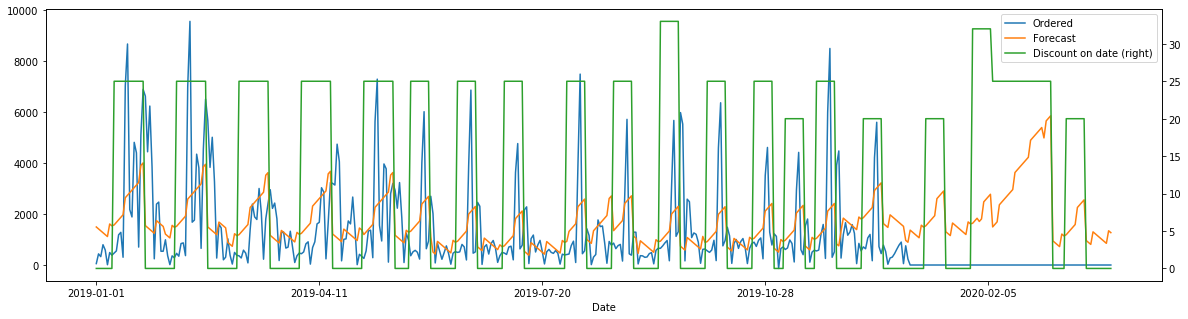

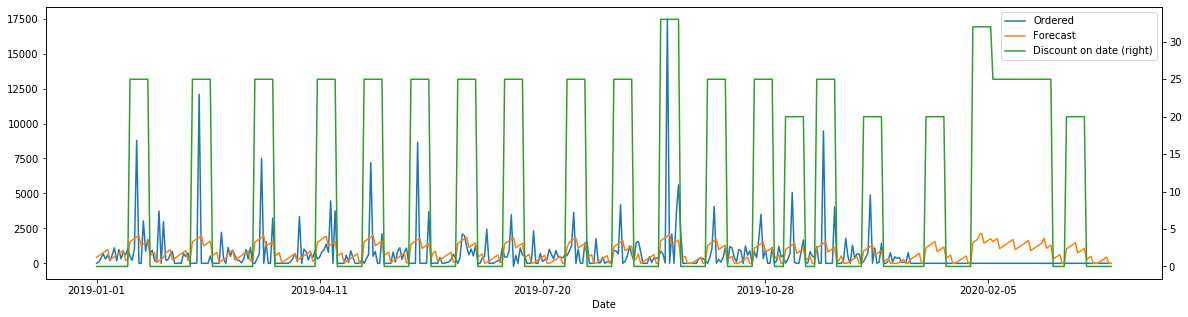

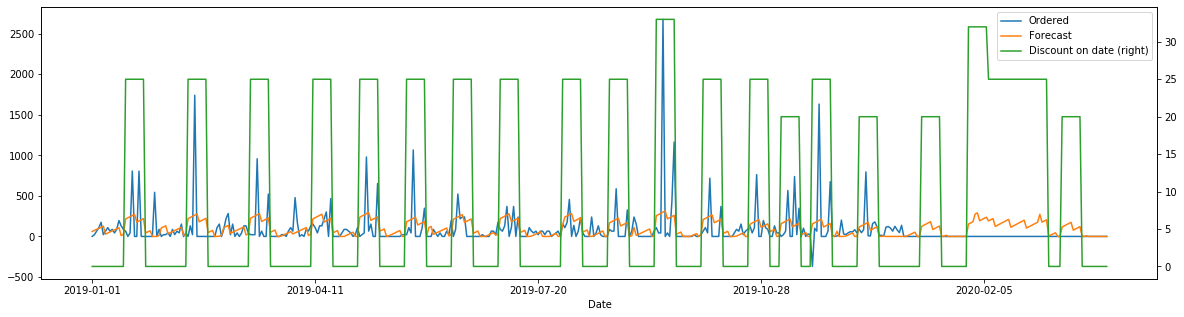

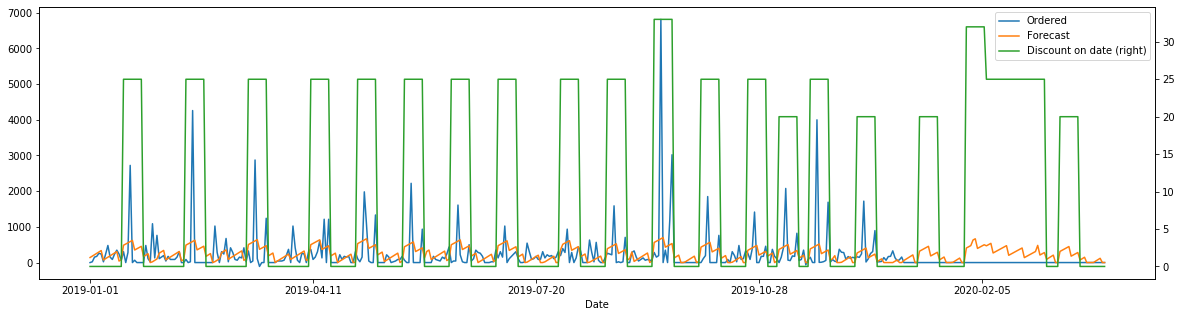

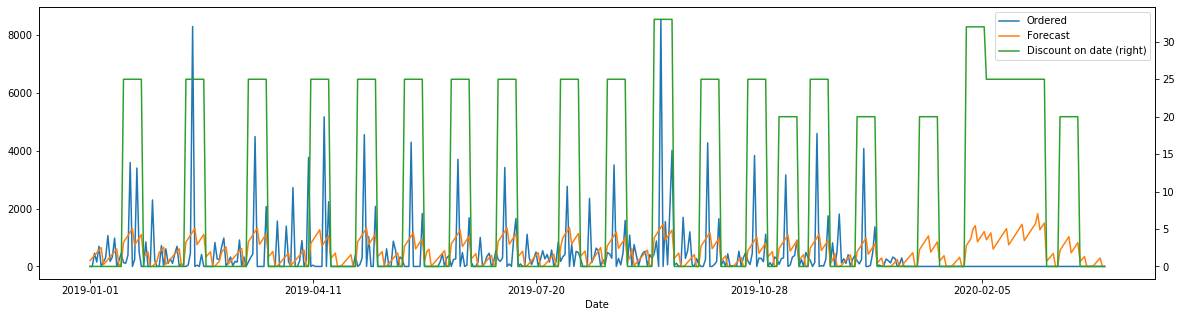

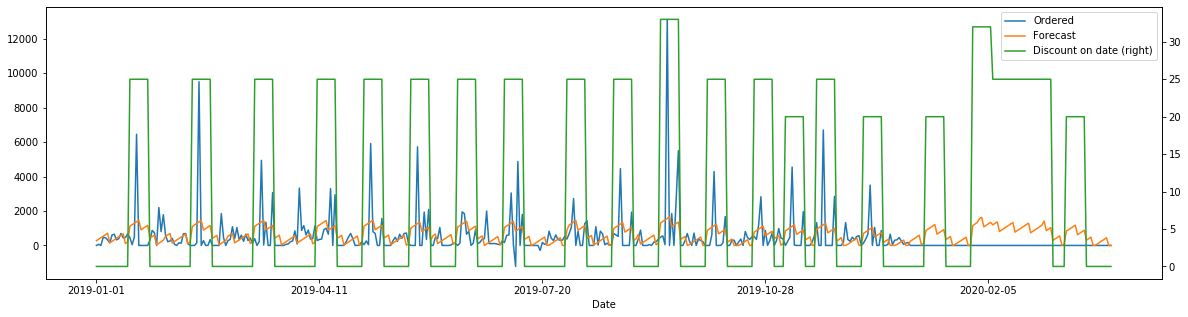

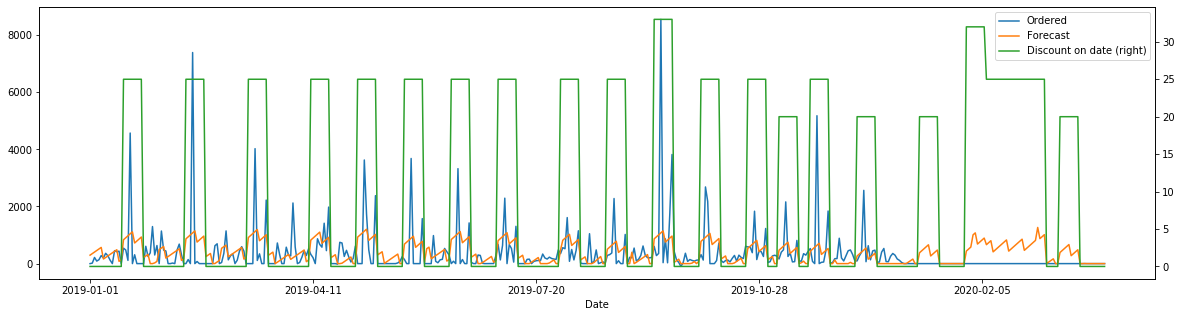

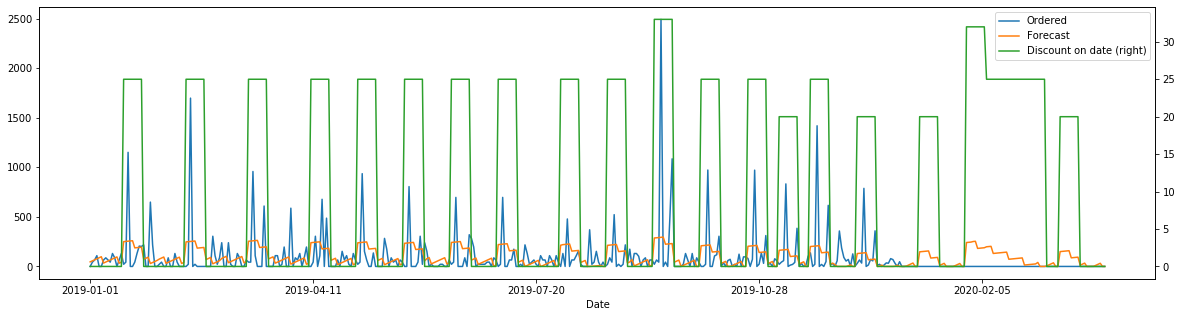

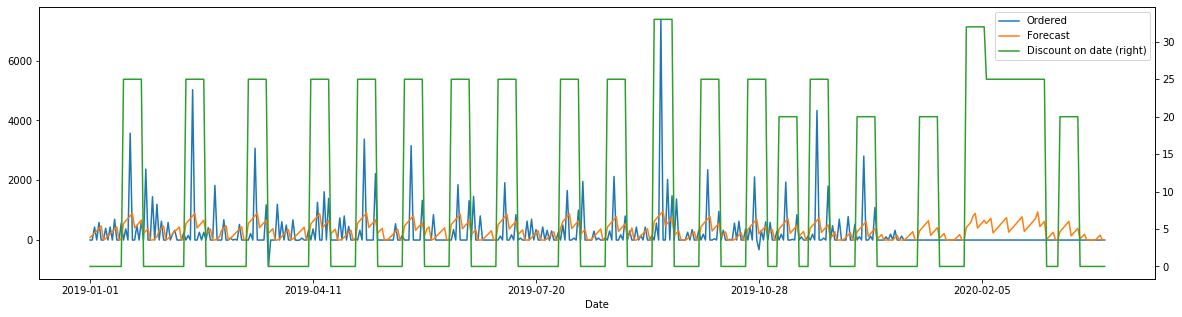

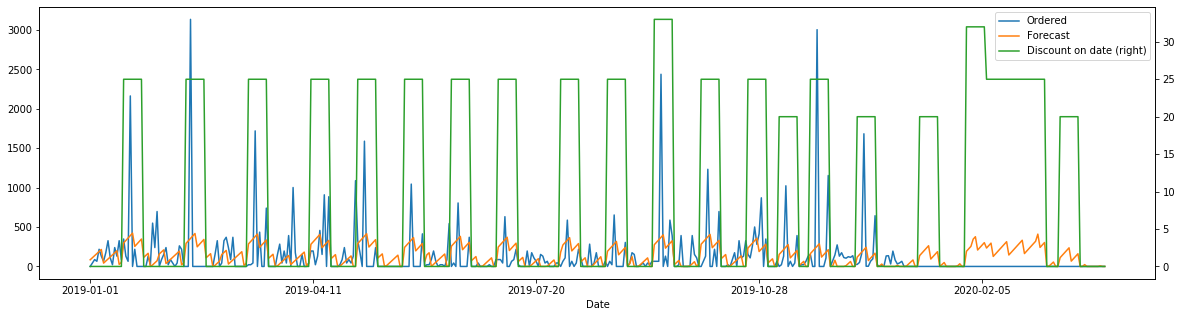

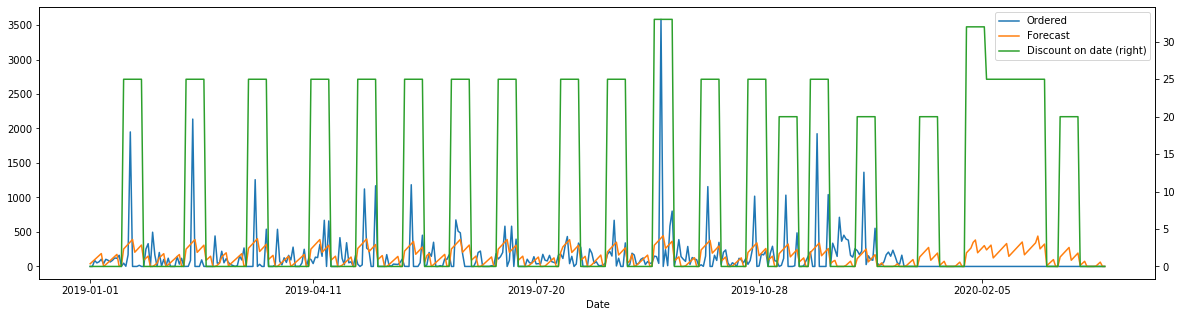

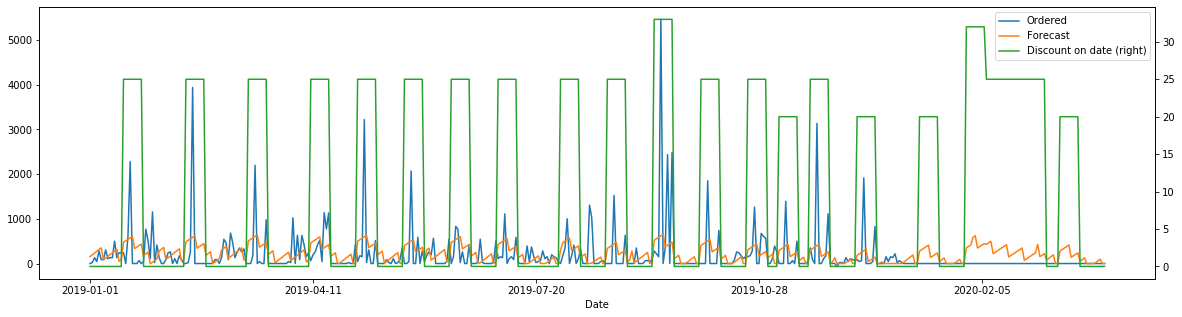

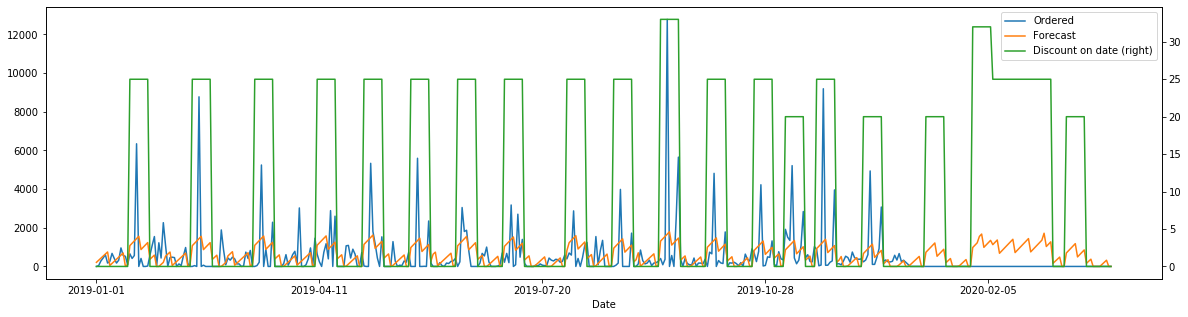

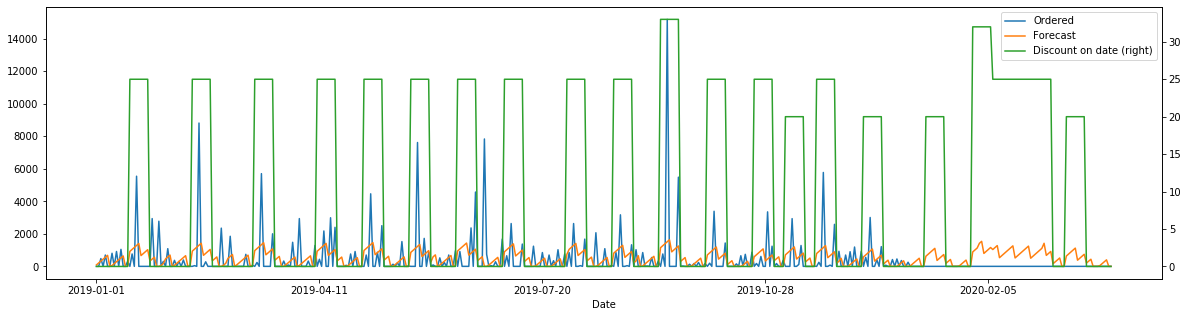

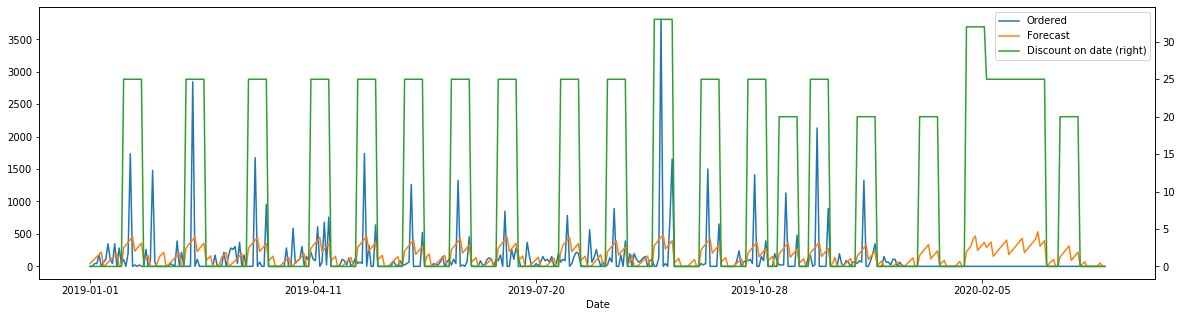

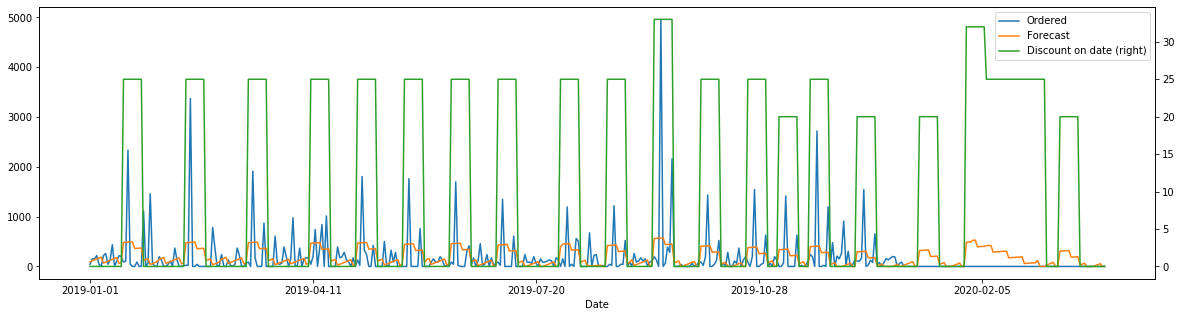

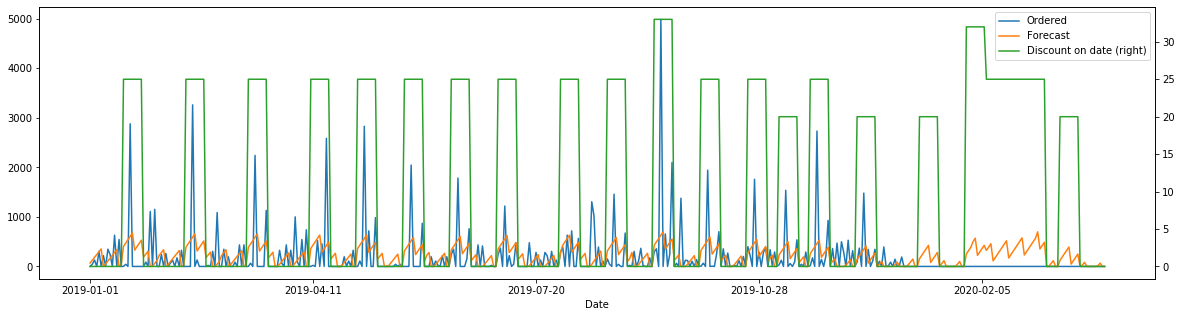

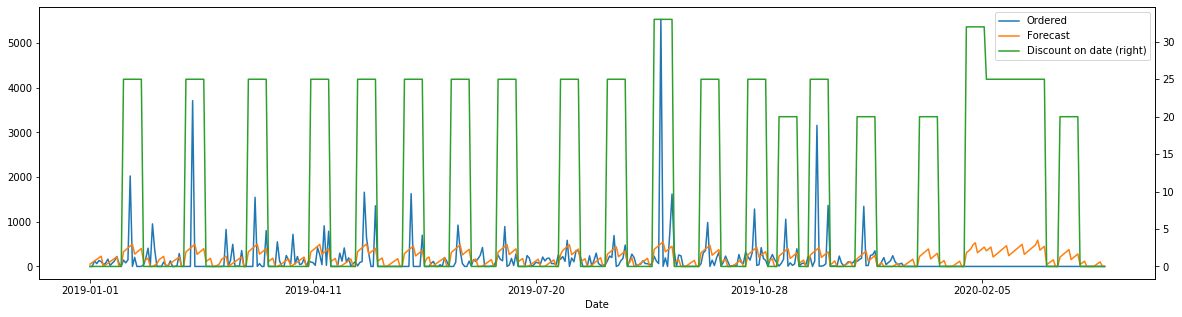

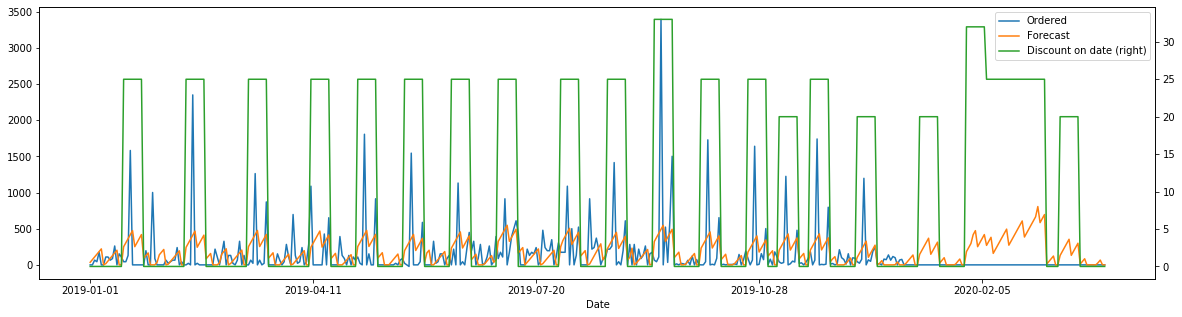

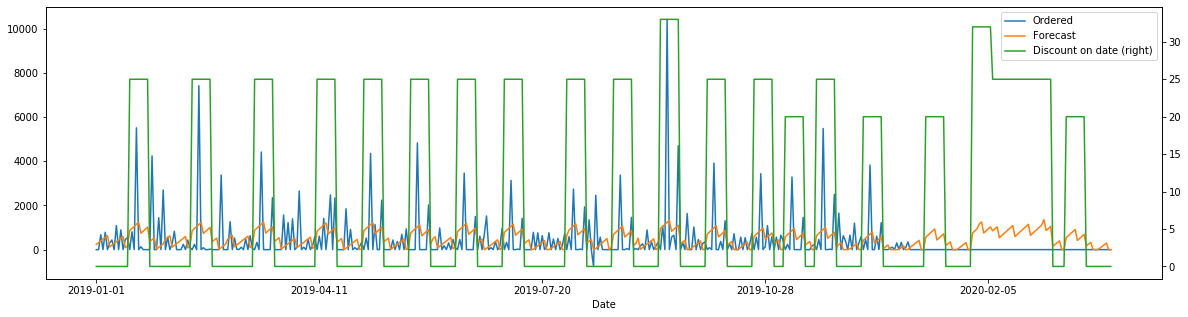

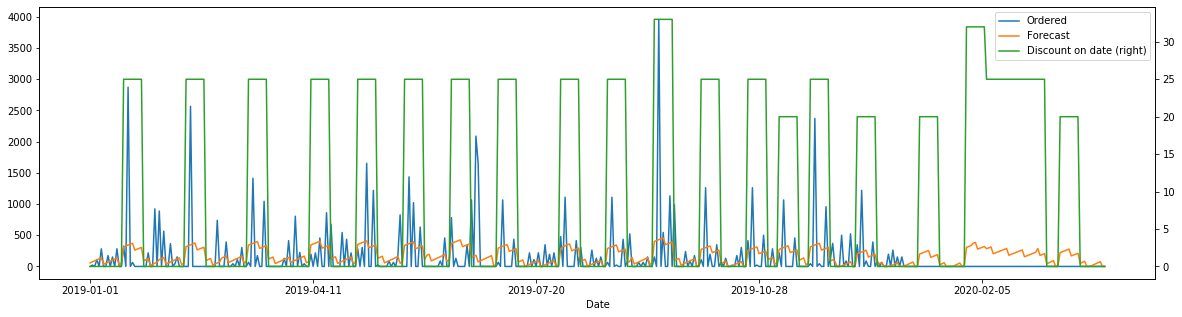

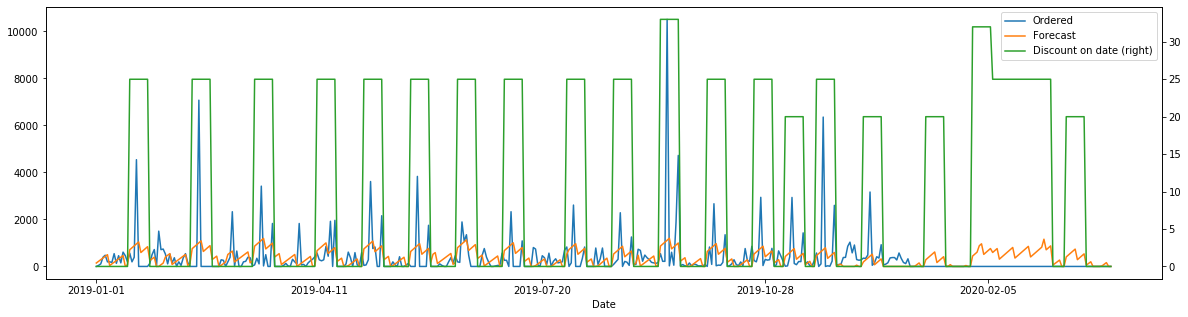

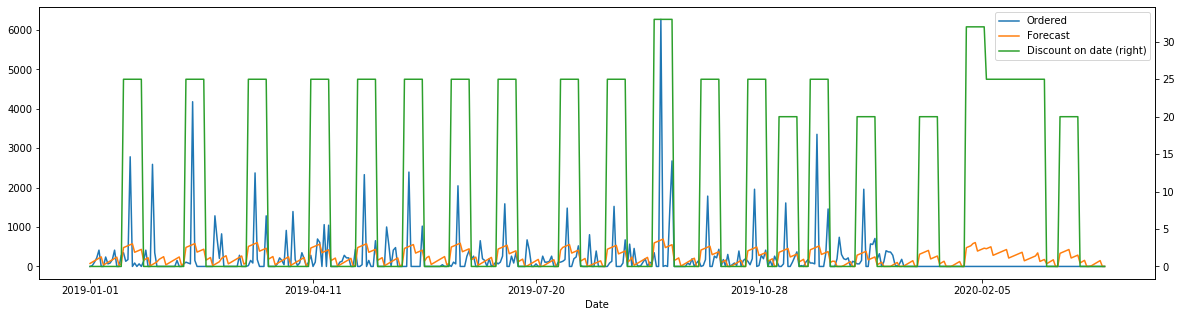

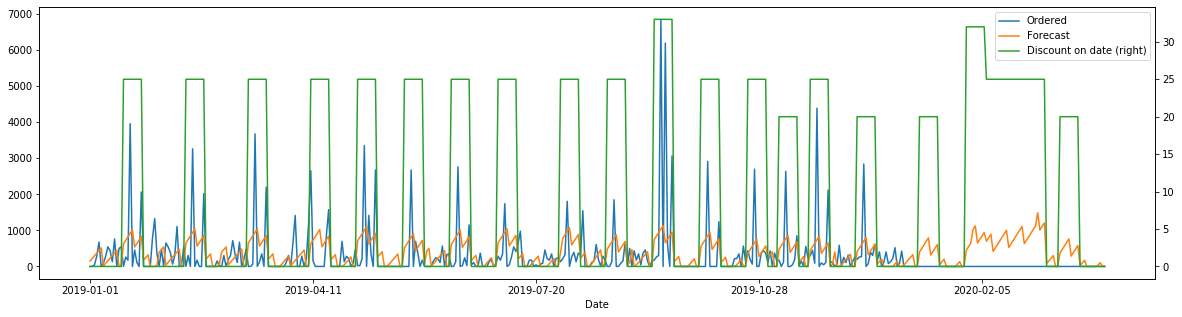

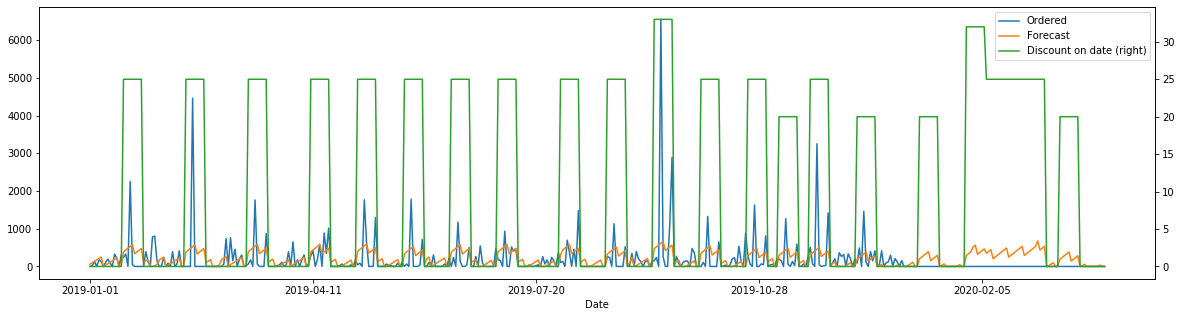

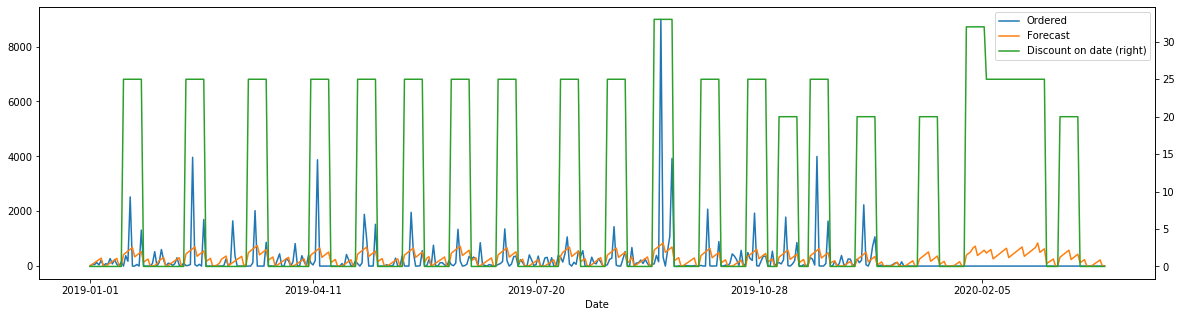

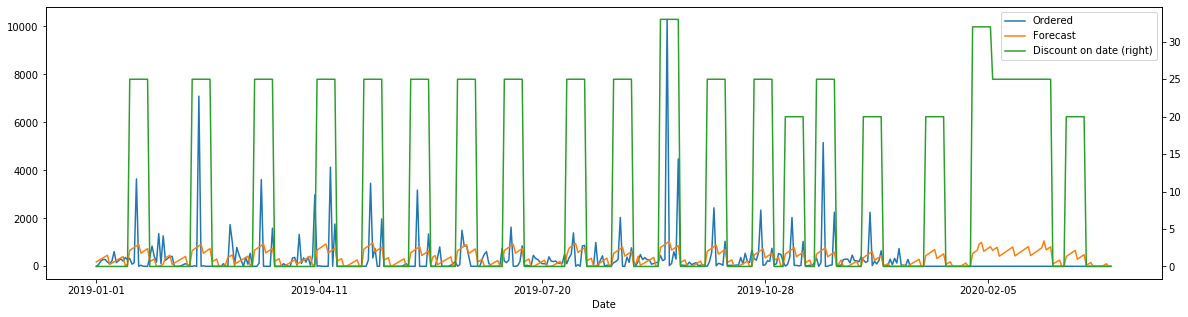

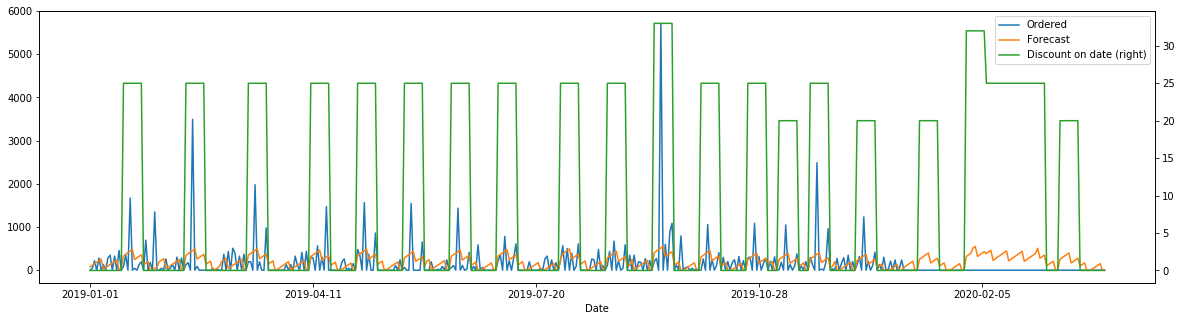

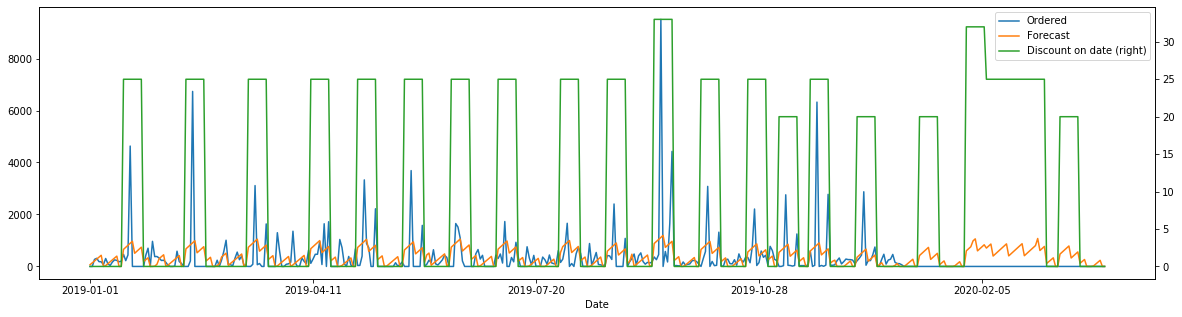

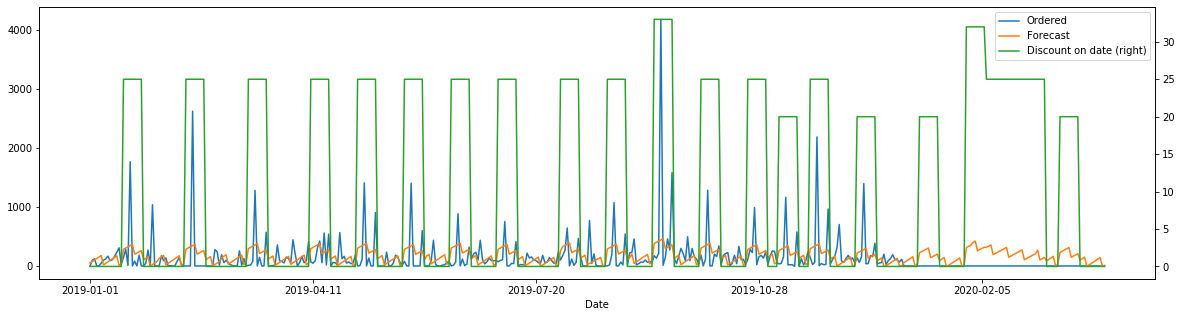

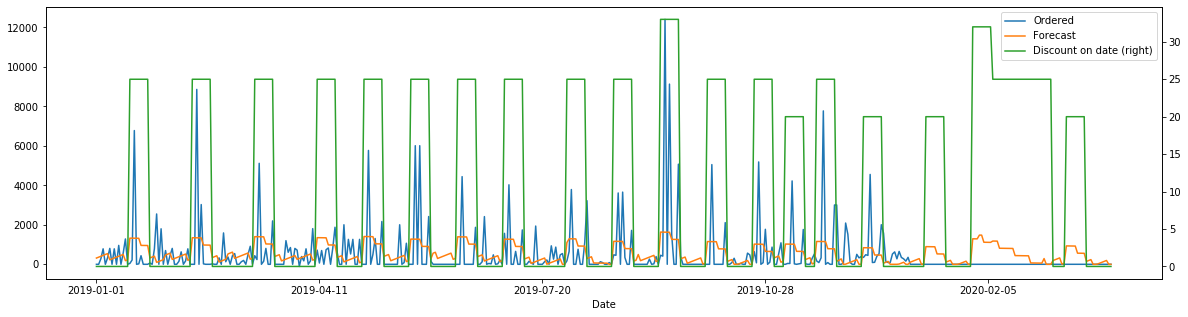

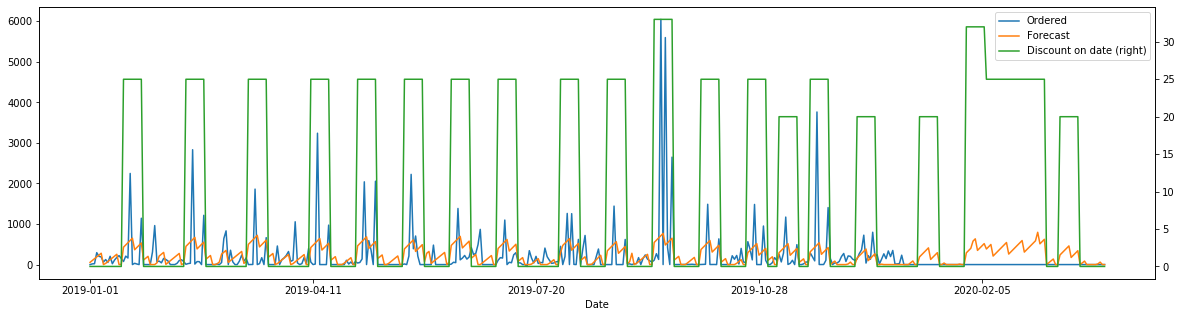

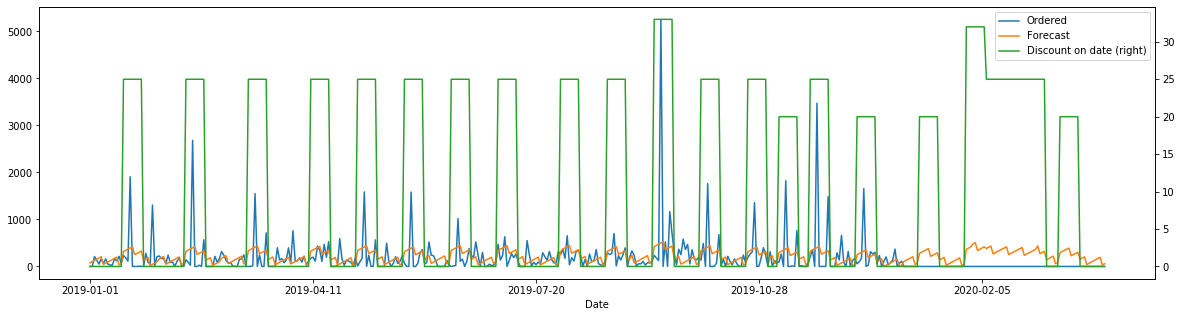

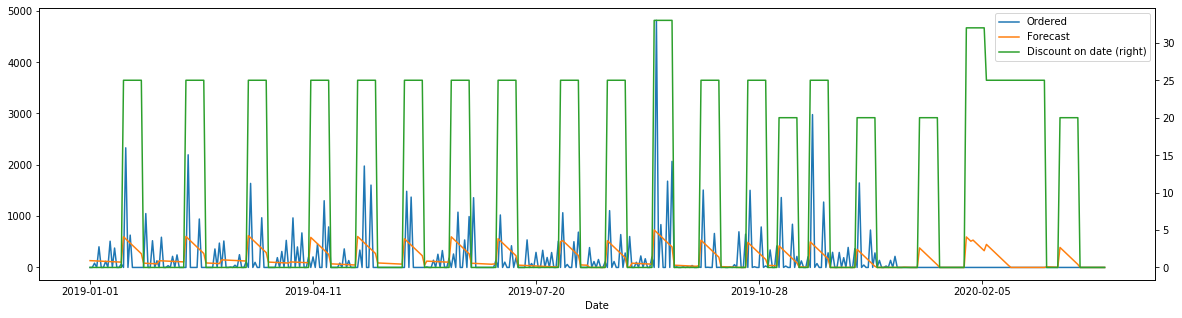

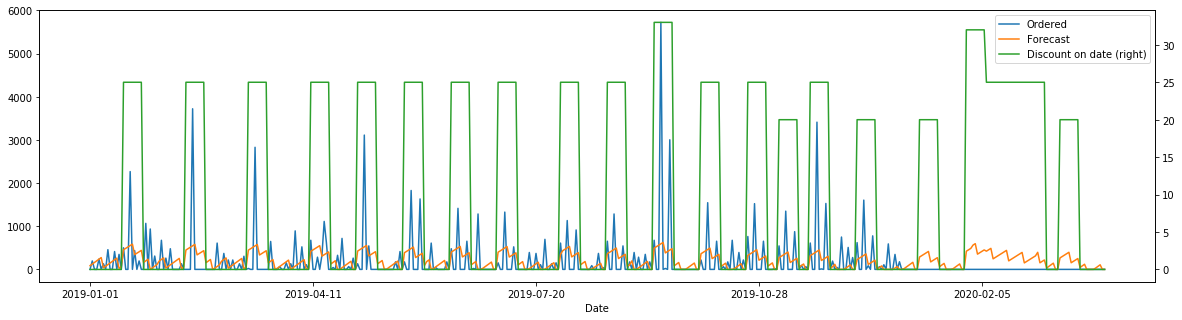

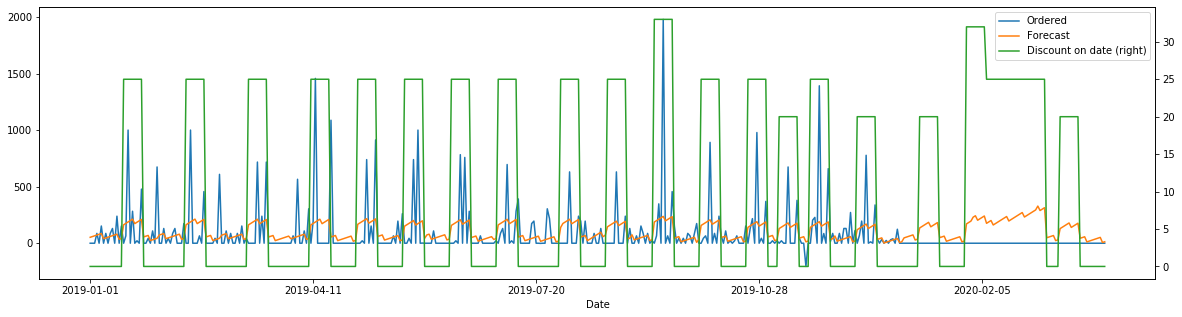

In [21]:
for key in res['key'].unique():
#     print(utils.metrics_promo(res)['Acc'].values)
    df = res[(res['key']==key)&(res['Date']>='2019-01-01')]#
    acc = (0 if len(utils.metrics_promo(df)['Acc'].values)==0 else utils.metrics_promo(df)['Acc'].values[0])
#     print(acc)
    df[['Date', 'Ordered', 'Forecast', 'Discount on date']].plot(figsize=(20, 5),
                                                                  x='Date', 
                                                                  secondary_y=['Discount on date'], 
                                                                  title= acc)

In [24]:
%%time
tmp = res.drop(columns=['Forecast'])
res_list = []
for key, df in tmp.groupby('key'):

    df = df[df['Discount on date']>0]
    df['SHIP_START'] = np.where(df['train/test/fc']=='train/test', df['SHIP_START'], df['FT_SHIP_START'])
    df_copy = df.copy()
    df = df.groupby(['key', 'SHIP_START'], as_index=False).agg({'train/test/fc':'first',
                                                                'M':'first',
                                                                'Y':'first',
                                                                'S':'first',
                                                                'Q':'first',
                                                                'Discount on date':'max',
                                                                'Ordered':'sum',
                                                                'Promo_day_num':'max'
                                                                })

    cols = ['M', 'Y', 'S', 'Q', 'Discount on date', 'Promo_day_num']
    y = df['Ordered']
    X = df[cols]

    X_train, X_test = X[df['train/test/fc']=='train/test'], X[df['train/test/fc']!='train/test']
    y_train, y_test = y[df['train/test/fc']=='train/test'], y[df['train/test/fc']!='train/test']
    if len(X_train)==0:
        continue
    model = xgb.XGBRegressor()

    model.fit(X_train, y_train)
    pred = model.predict(X)
    df['Forecast'] = pred/df['Promo_day_num']
    # df['SHIP_START'] = df['SHIP_START'].astype(str)
    df_copy = pd.merge(df_copy, df[['key', 'SHIP_START', 'Forecast']], how='left', on=['key', 'SHIP_START']).fillna(0)
    df_copy['FT_SHIP_START'] = df_copy['FT_SHIP_START'].apply(lambda x: str(x)[:10])
    df_copy['SHIP_START'] = df_copy['SHIP_START'].astype(str)
    res_list.append(df_copy)
results = pd.concat(res_list)
utils.metrics_promo(results)

CPU times: user 23 s, sys: 1.96 s, total: 24.9 s
Wall time: 2.23 s


Empty DataFrame
Columns: [PROMO_ID, Ordered, Forecast, AE, Acc, BIAS]
Index: []

In [28]:
# for key in results['key'].unique():
# #     print(utils.metrics_promo(res)['Acc'].values)
#     df = results[(results['key']==key)&(results['Date']>='2019-01-01')]#
#     acc = (0 if len(utils.metrics_promo(df)['Acc'].values)==0 else utils.metrics_promo(df)['Acc'].values[0])
# #     print(acc)
#     df[['Date', 'Ordered', 'Forecast', 'Discount on date']].plot(figsize=(20, 5),
#                                                                   x='Date', 
#                                                                   secondary_y=['Discount on date'], 
#                                                                   title= acc)

In [27]:
results[results['train/test/fc']=='fc'].groupby('SHIP_START').sum()

Ordered  Discount on date  Promo_day_num  \
SHIP_START                                                      
2020-01-08 00:00:00      0.0            6480.0         1620.0   
2020-01-29 00:00:00      0.0           10368.0         1620.0   
2020-02-06 00:00:00      0.0           24300.0        14580.0   
2020-03-11 00:00:00      0.0            6480.0         1620.0   

                     Stor Discount on date        Y     M     W    DoM   DoW  \
SHIP_START                                                                     
2020-01-08 00:00:00                      0   654480   324   792   3888   936   
2020-01-29 00:00:00                      0   654480   540  1764   3996   936   
2020-02-06 00:00:00                      0  1963440  2088  7776  15264  2916   
2020-03-11 00:00:00                      0   654480   972  3708   4860   936   

                       DoY   HY    Q     S  PINC  ON_TOP  ROTATION  \
SHIP_START                                                           
2020-01-08 00:00:00   3888  324  324   324   0.0     0.0       0.0   
2020-01-29 00:00:00  10692  324  324   324   0.0     0.0       0.0   
2020-02-06 00:00:00  49572  972  972  1116   0.0     0.0       0.0   
2020-03-11 00:00:00  24300  324  324   648   0.0     0.0       0.0   

                     count_delist_sku       Forecast  
SHIP_START                                            
2020-01-08 00:00:00               0.0  171819.619385  
2020-01-29 00:00:00               0.0  464606.953125  
2020-02-06 00:00:00               0.0  458023.978768  
2020-03-11 00:00:00               0.0  162033.644409

In [6]:
res[:2]

Date             key  Ordered  Discount on date  Promo_day_num  \
5207603  2018-01-01  0229_850120043    17.68               0.0            0.0   
5207604  2018-01-02  0229_850120043   193.12               0.0            0.0   

        SHIP_START  Stor Discount on date FT_SHIP_START train/test/fc     Y  \
5207603          0                      0             0    train/test  2018   
5207604          0                      0             0    train/test  2018   

         ...  Q  S  PINC  ON_TOP  ROTATION  count_delist_sku     Forecast  \
5207603  ...  1  1   0.0     0.0       0.0               0.0  1616.974344   
5207604  ...  1  1   0.0     0.0       0.0               0.0  1541.777958   

         Techbillto   Chain  PRODUCT_CODE  
5207603   850120043  MAGNIT          0229  
5207604   850120043  MAGNIT          0229  

[2 rows x 26 columns]

TypeError: 'int' object is not iterable